In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from methods import train_test_transform
from methods import pre
import tensorflow as tf
from Model import model_acc
from Model import model1_acc

df = pd.read_csv("FutbolMatches.csv")
df=df.iloc[:,1:]
df = pre(df)

X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38]]
y = df.iloc[:,24]

In [3]:
X_train, X_test, y_train, y_test = train_test_transform(1,X,y)

12/12 [==============================] - 0s 865us/step - loss: 0.5871 - accuracy: 0.6955


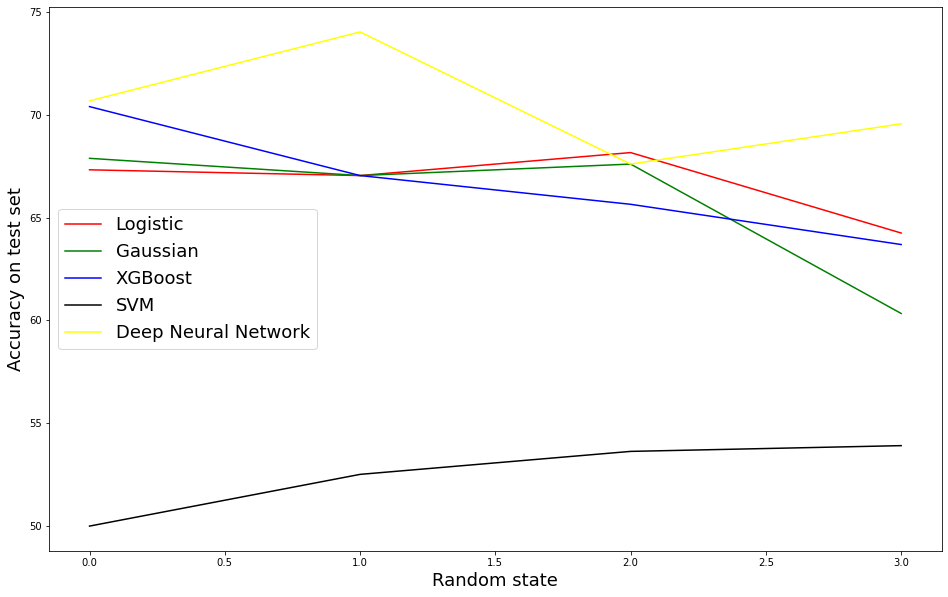

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

lii=[]
li=[]
li1=[]
li2=[]
li3=[]
li4=[]
for i in range(4):
    lii.append(i)
    X_train, X_test, y_train, y_test = train_test_transform(np.random.randint(1,100),X,y)
    clf=LogisticRegression().fit(X_train,y_train)
    li.append(clf.score(X_test,y_test)*100)
    clf1 = GaussianNB()
    clf1.fit(X_train, y_train)
    li1.append(clf1.score(X_test,y_test)*100)
    clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
    li2.append(clf2.score(X_test, y_test)*100)
    clf3 = svm.SVC(C=0.1)
    clf3.fit(X_train, y_train)
    li3.append(clf3.score(X_test,y_test)*100)
    li4.append(model_acc(X_train, X_test, y_train, y_test))

plt.figure(figsize=(16,10))
plt.plot(lii,li,c="r")
plt.plot(lii,li1,c="g")
plt.plot(lii,li2,c="b")
plt.plot(lii,li3,c="black")
plt.plot(lii,li4,c="yellow")
plt.legend(['Logistic', 'Gaussian', 'XGBoost', "SVM", "Deep Neural Network"],fontsize=18)
plt.ylabel("Accuracy on test set",fontsize=18)
plt.xlabel("Random state",fontsize=18)
plt.show()

Text(0, 0.5, 'Model')

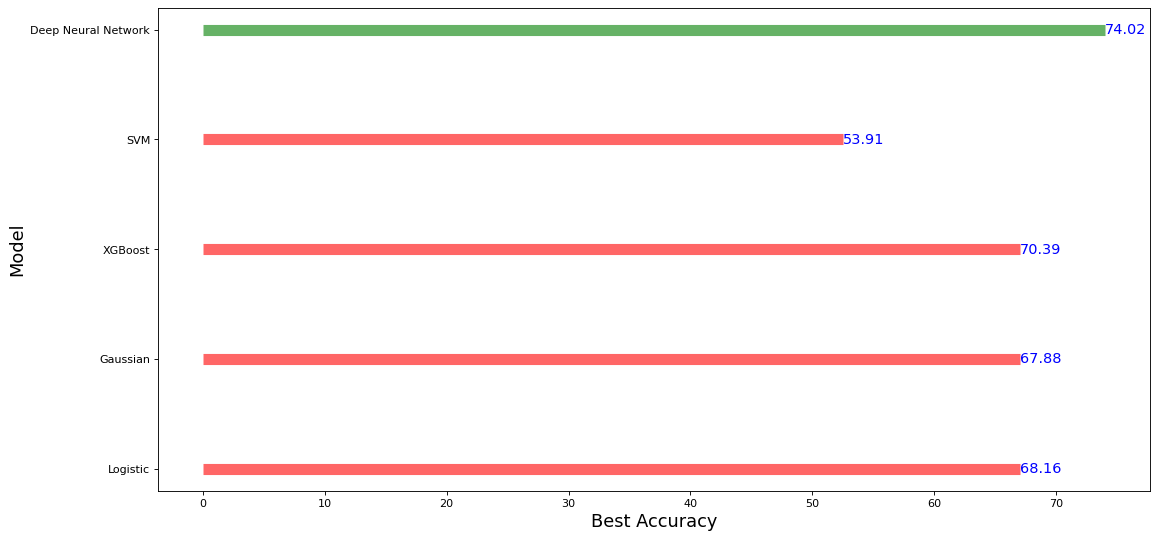

In [4]:
plt.figure(figsize=(16,8), dpi= 80)
plt.hlines(y=(['Logistic', 'Gaussian', 'XGBoost', "SVM", "Deep Neural Network"]), xmin=0, xmax=[li[1],li1[1],li2[1],li3[1],li4[1]],color=["red","red","red","red","green"], alpha=0.6, linewidth=10)
plt.text(li4[1],"Deep Neural Network", round(max(li4),2), verticalalignment='center', fontdict={'color':'blue', 'size':13})
plt.text(li3[1],"SVM", round(max(li3),2), verticalalignment='center', fontdict={'color':'blue', 'size':13})
plt.text(li2[1],"XGBoost", round(max(li2),2), verticalalignment='center', fontdict={'color':'blue', 'size':13})
plt.text(li1[1],"Gaussian", round(max(li1),2), verticalalignment='center', fontdict={'color':'blue', 'size':13})
plt.text(li[1],"Logistic", round(max(li),2), verticalalignment='center', fontdict={'color':'blue', 'size':13})
plt.xlabel("Best Accuracy",fontsize=16)
plt.ylabel("Model",fontsize=16)

In [4]:
df1=pd.read_csv("FutbolMatches.csv")
df1=df1.iloc[:,1:]
X1=df1.iloc[:,[6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,28,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46]]
y1=df1.iloc[:,[34]]
X1_train, X1_test, y1_train, y1_test = train_test_transform(4,X1,y1)
df1

,date,strong_team,weak_team,strong_score,weak_score,tournament,strong_overall,weak_overall,strong_attack,weak_attack,...,dif_midfield,dif_deffense,dif_bu_speed,dif_bu_passing,dif_cc_crossing,dif_cc_passing,dif_cc_shooting,dif_aggression,dif_preassure,dif_avg_age
0,2010-03-02,Brazil,Ireland,2,0,Friendly,84,75,83,72,...,7,9,0,-40,-10,0,0,-35,0,-0.73
1,2010-03-03,Denmark,Austria,1,2,Friendly,75,73,72,71,...,5,4,-20,-20,-15,-15,-15,-20,-5,3.03
2,2010-03-03,Croatia,Belgium,1,0,Friendly,78,76,77,73,...,-1,-1,5,-20,-25,5,-5,-15,0,2.04
3,2010-03-03,Spain,France,2,0,Friendly,85,83,83,82,...,1,0,-5,-10,-5,0,35,-15,5,-1.00
4,2010-03-03,Argentina,Germany,1,0,Friendly,83,82,83,81,...,2,-1,0,-32,23,11,0,-16,-28,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,2018-03-27,Sweden,Romania,0,1,Friendly,76,73,77,75,...,4,4,-2,2,-10,14,19,10,26,-1.30
1179,2018-03-27,France,Russia,3,1,Friendly,84,76,83,78,...,10,5,-15,-19,16,-39,-11,-16,3,-2.35
1180,2018-03-27,Spain,Argentina,6,1,Friendly,86,83,84,87,...,4,5,-4,-12,-4,-9,-16,-4,-1,-0.48
1181,2018-03-27,USA,Paraguay,1,0,Friendly,75,74,76,76,...,1,1,2,1,-28,34,1,16,-11,-1.87


In [6]:
clf=LogisticRegression().fit(X1_train,y1_train)
clf1=GaussianNB().fit(X1_train, y1_train)
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X1_train, y1_train)
clf3 = svm.SVC(C=0.1).fit(X1_train, y1_train)

In [7]:
mod1_acc = model1_acc(X1_train, X1_test, y1_train, y1_test)
score = []
score.append(clf.score(X1_test,y1_test)*100)
score.append(clf1.score(X1_test,y1_test)*100)
score.append(clf2.score(X1_test,y1_test)*100)
score.append(clf3.score(X1_test,y1_test)*100)
score.append(mod1_acc)

details = {
 "Model" : ['Logistic', 'Gaussian', 'XGBoost', "SVM", "Deep Neural Network"],
 "Accuracy_df1" : score,
 "Accuracy_df" : [max(li),max(li1),max(li2),max(li3),max(li4)]
}

df_details = pd.DataFrame(details)

13/13 [==============================] - 0s 721us/step - loss: 0.6952 - accuracy: 0.5550


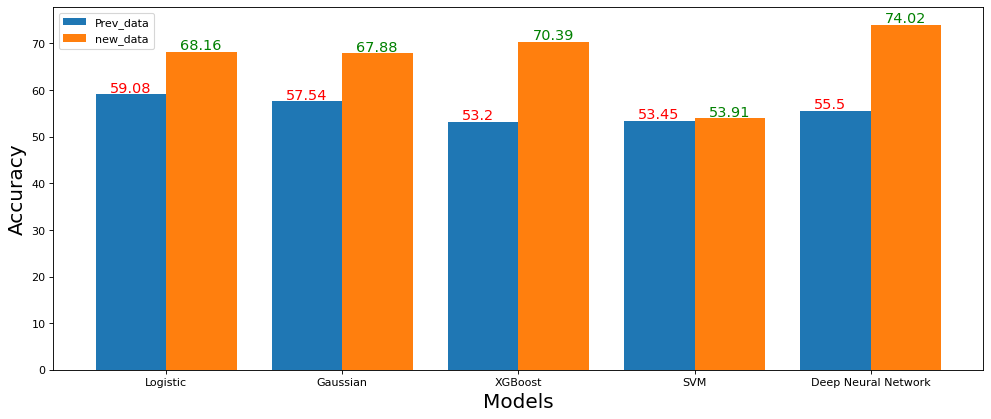

In [10]:
X_axis = np.arange(len(details["Model"]))
plt.figure(figsize=(15,6), dpi= 80)  
plt.bar(X_axis - 0.2, details["Accuracy_df1"], 0.4, label = 'Prev_data')
plt.bar(X_axis + 0.2, details["Accuracy_df"], 0.4, label = 'new_data')
plt.text(0 - 0.32,score[0]+0.5, round(score[0],2),  fontdict={'color':'red', 'size':13})
plt.text(1 - 0.32,score[1]+0.5, round(score[1],2),  fontdict={'color':'red', 'size':13})
plt.text(2 - 0.32,score[2]+0.5, round(score[2],2),  fontdict={'color':'red', 'size':13})
plt.text(3 - 0.32,score[3]+0.5, round(score[3],2),  fontdict={'color':'red', 'size':13})
plt.text(4 - 0.32,mod1_acc+0.5, round(mod1_acc,2),  fontdict={'color':'red', 'size':13})

plt.text(0 + 0.08,max(li)+0.5, round(max(li),2),  fontdict={'color':'green', 'size':13})
plt.text(1+ 0.08,max(li1)+0.5, round(max(li1),2),  fontdict={'color':'green', 'size':13})
plt.text(2 + 0.08,max(li2)+0.5, round(max(li2),2),  fontdict={'color':'green', 'size':13})
plt.text(3 + 0.08,max(li3)+0.5, round(max(li3),2),  fontdict={'color':'green', 'size':13})
plt.text(4 + 0.08,max(li4)+0.5, round(max(li4),2),  fontdict={'color':'green', 'size':13})
plt.xticks(X_axis, details["Model"])
plt.xlabel("Models",fontsize=18)
plt.ylabel("Accuracy",fontsize=18)
plt.legend()
plt.show()